<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-задачи" data-toc-modified-id="Описание-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-окружения" data-toc-modified-id="Подготовка-окружения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подготовка окружения</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

## Описание задачи

__Необходимо подготовить прототип модели машинного обучения для компании «Цифра».__ Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Компания предоставила данные с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

__В рамках проекта необходимо:__

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Краткое описание процесса добычи золота из руды:
После добычи руды и обработки получается дробленая смесь. Ее отправляют на флотацию (обогащение) и двухэтапную очистку:
1. Флотация
        Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
        На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).


2. Очистка
        Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

![](https://pictures.s3.yandex.net/resources/viruchka_1576238830.jpg)

Эффективность обогащения руды рассчитывается по следующей формуле:

![](https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg)

где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

Качество модели оценивается с использованием метрики __sMAPE__ (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

Формула для вычисления sMAPE:
![](https://pictures.s3.yandex.net/resources/smape_1576238825.jpg)
где:
- yi – значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество;
- ^yi – (y с крышечкой) – значение предсказания для объекта с порядковым номером i, например, в тестовой выборке;
- N – количество объектов в выборке.


Данные находятся в трёх файлах:
- `gold_recovery_train_new.csv` — обучающая выборка;
- `gold_recovery_test_new.csv` — тестовая выборка;
- `gold_recovery_full_new.csv` — исходные данные.


Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

Предоставленные данные являются сырыми и требуют проверки на корректность и предобработки.

__Описание данных:__

__Технологический процесс:__
- `Rougher feed` — исходное сырье;
- `Rougher additions (или reagent additions)` — флотационные реагенты: Xanthate, Sulphate, Depressant;
- `Xanthate **`— ксантогенат (промотер, или активатор флотации);
- `Sulphate` — сульфат (на данном производстве сульфид натрия);
- `Depressant` — депрессант (силикат натрия);
- `Rougher process` (англ. «грубый процесс») — флотация;
- `Rougher tails` — отвальные хвосты;
- `Float banks` — флотационная установка;
- `Cleaner process` — очистка;
- `Rougher Au` — черновой концентрат золота;
- `Final Au` — финальный концентрат золота.

__Параметры этапов:__
- `air amount` — объём воздуха;
- `fluid levels` — уровень жидкости;
- `feed size` — размер гранул сырья;
- `feed rate` — скорость подачи.

__Наименование признаков:__

1. Название признака имеет следующую структуру: `[этап].[тип_параметра].[название_параметра]`. Пример: `rougher.input.feed_ag`


1. Возможные значения для блока `[этап]`:
    - `rougher` — флотация;
    - `primary_cleaner` — первичная очистка;
    - `secondary_cleaner` — вторичная очистка;
    - `final` — финальные характеристики.
   
   
1. Возможные значения для блока `[тип_параметра]`:
    - `input` — параметры сырья;
    - `output` — параметры продукта;
    - `state` — параметры, характеризующие текущее состояние этапа;
    - `calculation` — расчётные характеристики.
    

Необходимо построить прогноз для двух величин:
1. Эффективность обогащения чернового концентрата `rougher.output.recovery`.
2. Эффективность обогащения финального концентрата `final.output.recovery`.

Итоговая метрика складывается из значений метрики sMAPE для каждой из этих величин в соотношении, взвешенно, с весами 0.25 для эффективности обогащения чернового концентрата и 0.75 для эффективности обогащения финального концентрата.

### Подготовка окружения

В рамках одной ячейкий загрузим все необходимые в проекте модули.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

## Подготовка данных

Загрузим данные и выведем на экран обзорную информацию для таблицы `gold_recovery_full_new.csv`.

In [2]:
train = pd.read_csv('-') # Прямая ссылка на датасет удалена в связи с правилами публикации проектов
test = pd.read_csv('-') # Прямая ссылка на датасет удалена в связи с правилами публикации проектов
full = pd.read_csv('-') # Прямая ссылка на датасет удалена в связи с правилами публикации проектов

In [3]:
print(train.shape)
print(test.shape)
full.info()

(14149, 87)
(5290, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               1

В данных есть пропуски, однако их количество для большинства столбцов незначительное. Только в столбце `secondary_cleaner.output.tail_sol` значительное количество пропусков. В условиях от заказчика указано, что соседние наблюдения часто имеют схожие характеристики, соответственно мы можем заменить пропуски ближайшим числом.

Проверим точность расчета эффективности обогащения чернового концентрата.

In [4]:
target = ((train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - train['rougher.output.tail_au']))/
          (train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au']))) * 100

In [5]:
print(mean_absolute_error(train['rougher.output.recovery'], target))
print(train['rougher.output.recovery'].describe())
print(target.describe())

9.73512347450521e-15
count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64
count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
dtype: float64


MAE принимает небольшое значение, статистические параметры нашего расчета практически точно повторяют параметры поллученных рассчетов. Это свидетельствует о том, что параметры рассчитаны верно. Соответственно мы можем использовать  эти параметры из полного датасета для того, что бы сформировать целевые признаки для тестового датасета.

Проверим, какая информация из полного датасета отсутствует в тестовой выборке.

In [6]:
full.loc[:, ~full.columns.isin(list(test.columns))].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                                19439 non-null  float64


В тестовой выборке ожидаемо отсутствуют расчетные и фактические параметры полученного продукта для всех этапов очистки руды. Это закономерно, так как добавление таких параметров приведет к утечке данных и к тому, что модель будет опираться на рассчетные параметры, вместо собственной оценки. Кроме этого такие параметры будут недоступны при работе модели в реальных условиях, соответственно модель следует обучать только на имеющихся в распоряжении данных.

По результатам изучения данных в рамках предобработки следует провести следующие преобразования:
1. Заменить пропуски в данных.
2. Масштабировать признаки в датасете.
3. Сформировать датасеты для обучения и проверки моделей с учетом известной информации на момент предсказания.
4. Отбросить данные времени, так как эта информация избыточна и не поможет обучению модели.

Заменим пропуски в данных на ближайшее значение.

In [7]:
test.ffill(inplace=True)
train.ffill(inplace=True)
full.ffill(inplace=True)

Масштабируем признаки в датасетах.

In [8]:
numeric = ['primary_cleaner.input.sulfate','primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size','primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air','primary_cleaner.state.floatbank8_a_level','primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level','primary_cleaner.state.floatbank8_c_air','primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air','primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate','rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate','rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate','rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air','rougher.state.floatbank10_f_level',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air','rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air','rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'secondary_cleaner.state.floatbank2_a_air','secondary_cleaner.state.floatbank2_a_level','secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level','secondary_cleaner.state.floatbank3_a_air','secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air','secondary_cleaner.state.floatbank3_b_level','secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level','secondary_cleaner.state.floatbank4_b_air','secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air','secondary_cleaner.state.floatbank5_a_level','secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level','secondary_cleaner.state.floatbank6_a_air','secondary_cleaner.state.floatbank6_a_level']
scaler = StandardScaler()
scaler.fit(train[numeric])
test[numeric] = scaler.transform(test[numeric])
train[numeric] = scaler.transform(train[numeric])

## Анализ данных

Исследуем концентрацию металлов на различных этапах очистки.

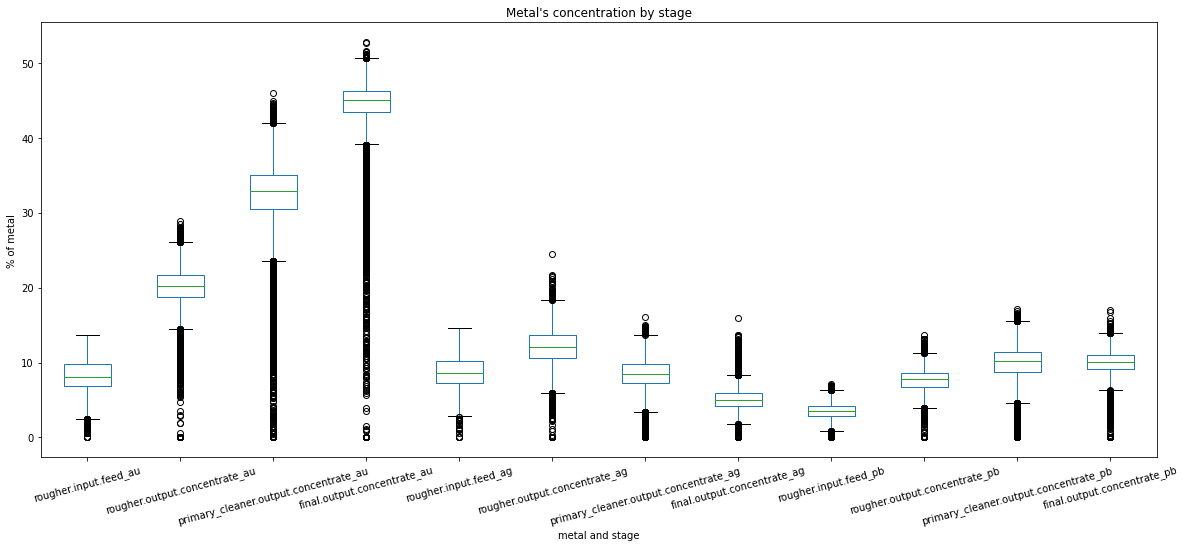

In [9]:
sorter = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au',  
          'rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag',
          'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb',]
full[['rougher.input.feed_ag',
      'rougher.input.feed_pb',
      'rougher.input.feed_au',
      'final.output.concentrate_ag',
      'final.output.concentrate_pb',       
      'final.output.concentrate_au',       
      'primary_cleaner.output.concentrate_ag',       
      'primary_cleaner.output.concentrate_pb',       
      'primary_cleaner.output.concentrate_au',       
      'rougher.output.concentrate_ag',       
      'rougher.output.concentrate_pb',       
      'rougher.output.concentrate_au']].reindex(sorter, axis=1).plot(kind='box', figsize=(20,8), title='Metal\'s concentration by stage')
plt.ylabel('% of metal')
plt.xlabel('metal and stage')
plt.xticks(rotation=15)
plt.show()

На графике распределений концентрации металлов на разных стадиях очистки четко видно, как увеличивается доля золота в сырье с медианных 8 процентов до 46. Доля серебра, сперва равное доле золота, сперва увеличивается на этапе флотации, на последующих этапах уменьшается до 5 процентов. Доля свинца постепенно увеличивается и достигает пика в 9 процентах, после чего на этапе повторной очистки остается неизменной.

Примечательно, что несмотря на серьезное увеличение медианного значения количества золота, от нуля за ним тянется длинный, жирный хвост из выбросов. Некоторые пробы, вероятно содержат в себе крайне малое количество золота, которое сложно выделить при очистке.

Сравним распределения гранул сырья на обучающей и тестовой выборках.

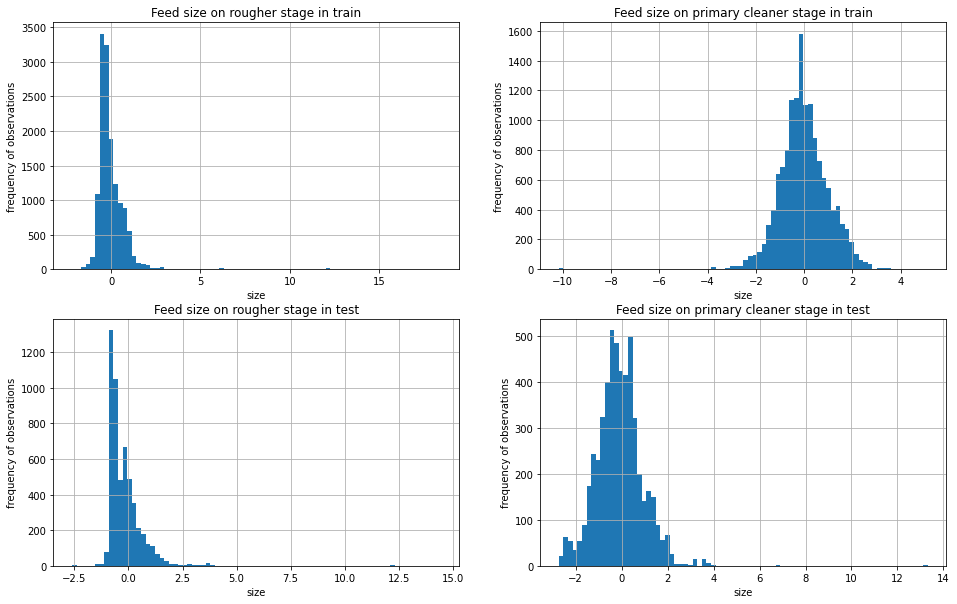

In [10]:
fig, axs = plt.subplots(2,2, figsize=(16,10))
train['rougher.input.feed_size'].hist(ax=axs[0,0], bins=80)
axs[0,0].title.set_text('Feed size on rougher stage in train')
train['primary_cleaner.input.feed_size'].hist(ax=axs[0,1], bins=80)
axs[0,1].title.set_text('Feed size on primary cleaner stage in train')
test['rougher.input.feed_size'].hist(ax=axs[1,0], bins=80)
axs[1,0].title.set_text('Feed size on rougher stage in test')
test['primary_cleaner.input.feed_size'].hist(ax=axs[1,1], bins=80)
axs[1,1].title.set_text('Feed size on primary cleaner stage in test')
for ax in axs.flat:
    ax.set(xlabel='size', ylabel='frequency of observations')

In [11]:
full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


На тестовой и тренировочной выборкак форма распределения достаточно похожа. Размер гранул на этапе флотации тяготеет к 0, распределен нормально, но распределение скошено вправо. На этапе первичной очистки распределения также похожи, однако на тренировочной выборке есть незначительные выбросы в меньшую сторону, а на тестовой в большую сторону.

В целом распределения достаточно похожи и можно на этих данных строить модель.

Изучим суммарную концентрацию всех веществ на различных стадиях очистки.

In [12]:
rougher_input_concentration = (full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] + full['rougher.input.feed_au'])
final_concentration = (full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_au'])
primary_cleaner_concentration = (full['primary_cleaner.output.concentrate_ag']    + full['primary_cleaner.output.concentrate_au'] + full['primary_cleaner.output.concentrate_pb'])
rougher_output_concentration = (full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_au'])

print(f'Суммарная концентрация входящего сырья: {rougher_input_concentration.mean()}, сырья после флотации: {rougher_output_concentration.mean()}, сырья после первичной очистки: {primary_cleaner_concentration.mean()}, финального сырья: {final_concentration.mean()}')


Суммарная концентрация входящего сырья: 20.646120463989536, сырья после флотации: 39.37303181255475, сырья после первичной очистки: 50.372125024905706, финального сырья: 59.22372129365595


После всех преобразований, концентрация веществ в материале повыысилась с 20 до 59 процентов. При этом концентрация золота повысилась намного больше остальных, с 8 до 45 процентов. Изучим распределение суммарной концентрации на каждом из этапов.

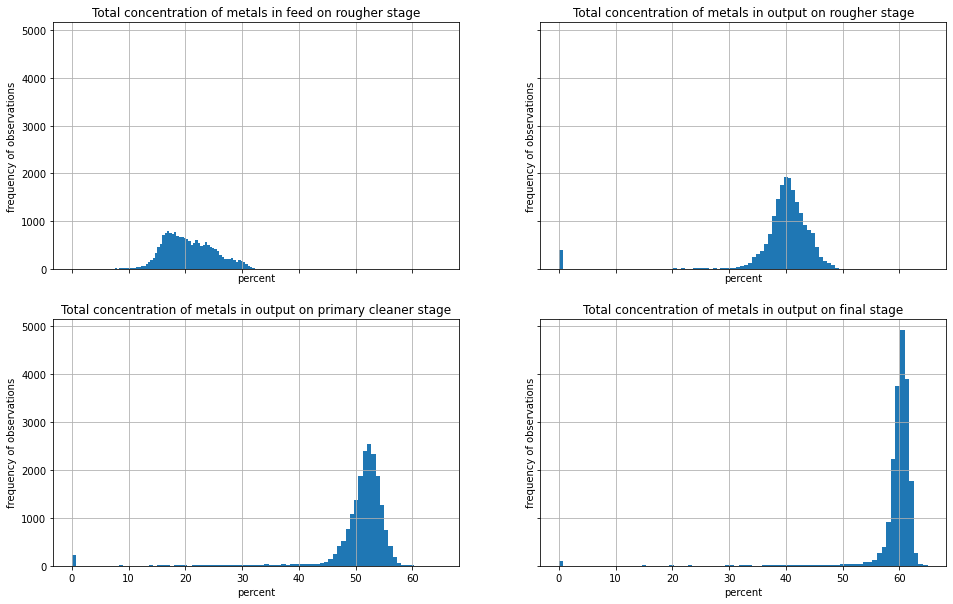

In [13]:
fig, axs = plt.subplots(2,2, figsize=(16,10), sharex=True, sharey=True)
rougher_input_concentration.hist(ax=axs[0,0], bins=80)
axs[0,0].title.set_text('Total concentration of metals in feed on rougher stage')
rougher_output_concentration.hist(ax=axs[0,1], bins=80)
axs[0,1].title.set_text('Total concentration of metals in output on rougher stage')
primary_cleaner_concentration.hist(ax=axs[1,0], bins=80)
axs[1,0].title.set_text('Total concentration of metals in output on primary cleaner stage')
final_concentration.hist(ax=axs[1,1], bins=80)
axs[1,1].title.set_text('Total concentration of metals in output on final stage')
for ax in axs.flat:
    ax.set(xlabel='percent', ylabel='frequency of observations')

В распределении концентрации веществ на каждой стадии наблюдается закономерная зависимость. Сперва распределение концентрации очень размазано - сырье, подаваемое на флотацию имеет нестабильную концентрацию и скошено вправо. После флотации концентрация сырья повышается, процент концентрации в среднем достигает 40, распредееление все больше походит на нормальное. После первичной очистки средний процент повышается и все распределение смещается вправо. После финальной очистки среднее значение достигает 60 и распределение "сжимается" к среднему. На всем этом пути, распределение становится все уже и среднее значение все выраженнее. Это говорит о стабильном результате производства, отклонения незначительны и обусловлены по большей части низкокачественным сырьем.

Однако на графике наблюдается определенное количество нулевых значений. Так как в построеннии графика использовалась концентрация нескольких металлов, а на графике сырья для первичной очистки отсутсвуют нулевые значения, практически невозможно получение такого результата в ходе очистки. Маловероятно, что в ходе очистки получаются партии пустой породы. Соответственно вероятнее всего это ошибка внесения или измерения. Удалим строки, имеющие нулевые значения суммарной концентрации из датасета.

In [14]:
to_remove_from_datasets = full[((rougher_input_concentration == 0) |
                                (final_concentration == 0) |
                                (primary_cleaner_concentration == 0) |
                                (rougher_output_concentration == 0))].date.to_list()

In [15]:
train = train[~train['date'].isin(to_remove_from_datasets)]
test = test[~test['date'].isin(to_remove_from_datasets)]
full = full[~full['date'].isin(to_remove_from_datasets)]

Данные проанализированы, нулевые значения убраны. Можно обучать модель.

## Модель

Сформируем датасеты для обучения и проверки. Для избежания утечки данных удалим из тренировочного датасета столбцы, которые отсутствуют в тестовом. В процессе работы модели в реальных условиях эти данные не будут нам доступны, соответственно обучать модель на них будет бессмысленно.

In [16]:
feature_train = train.loc[:, train.columns.isin(test.columns)].reset_index(drop=True)
target_train_rougher = train.loc[:, 'rougher.output.recovery'].reset_index(drop=True)
target_train_final = train.loc[:, 'final.output.recovery'].reset_index(drop=True)
feature_test = test.copy().reset_index(drop=True)
target_test_rougher = full.loc[full.date.isin(test.date), 'rougher.output.recovery'].reset_index(drop=True)
target_test_final = full.loc[full.date.isin(test.date), 'final.output.recovery'].reset_index(drop=True)

In [17]:
print(feature_train.shape)
print(target_train_rougher.shape)
print(target_train_final.shape)
print(feature_test.shape)
print(target_test_rougher.shape)
print(target_test_final.shape)

(13725, 53)
(13725,)
(13725,)
(5123, 53)
(5123,)
(5123,)


Датасеты сформированы, можно приступать к анализу даннных.

Отбросим значения даты.

In [18]:
feature_train = feature_train.drop('date', axis=1)
feature_test = feature_test.drop('date', axis=1)

In [19]:
feature_test.shape, feature_train.shape

((5123, 52), (13725, 52))

Напишем функцию для вычисления sMAPE.

In [20]:
def smape(target, predicted):
    return (((target - predicted).apply(abs) /
            ((target.apply(abs) + predicted.apply(abs)) / 2)) * 100).mean()

In [21]:
def smape(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2
    result = (error / scale).mean()
    return result

Обучим модели и посчитаем метрику.

In [22]:
model = LinearRegression()
model.fit(feature_train, target_train_rougher)
smape(target_test_rougher, pd.Series(model.predict(feature_test)))

0.048674530942613606

In [23]:
model = LinearSVR(random_state=12345)
model.fit(feature_train, target_train_rougher)
smape(target_test_rougher, pd.Series(model.predict(feature_test)))

0.04938549295201719

In [24]:
model = DecisionTreeRegressor(random_state=12345)
model.fit(feature_train, target_train_rougher)
smape(target_test_rougher, pd.Series(model.predict(feature_test)))

0.0670478870245472

Лучшее значение показывает обычная линейная регрессия, дерево решений показало худшее значение.

Протестируем модели кросс-валидацией.

In [158]:
scores_rougher = [[],[],[]]
scores_final = [[],[],[]]
sample_size = int(len(feature_train)/3)
counter = 0
for model in (LinearRegression(), LinearSVR(random_state=12345), DecisionTreeRegressor(random_state=12345)):
    for i in range(1,4):

        valid_indexes = range(i, i*sample_size)
        train_indexes = [x for x in range(0, len(feature_train)) if x not in valid_indexes]
        features_valid = feature_train.loc[valid_indexes,]
        features_train = feature_train.loc[train_indexes,]
        target_rougher_train = target_train_rougher.loc[train_indexes,]
        target_rougher_valid = target_train_rougher.loc[valid_indexes,]
        target_final_train = target_train_final.loc[train_indexes,]
        target_final_valid = target_train_final.loc[valid_indexes,]
        
        model.fit(features_train, target_rougher_train)
        scores_rougher[counter].append(smape(target_rougher_valid, pd.Series(model.predict(features_valid))))
        model.fit(features_train, target_final_train)
        scores_final[counter].append(smape(target_final_valid, pd.Series(model.predict(features_valid))))
        
    weighted_smape = (sum(scores_rougher[counter]) / len(scores_rougher[counter])) * 0.25 + (sum(scores_final[counter]) / len(scores_final[counter])) * 0.75
    print(f'Взвешеннное значение метрики sMAPE для {type(model).__name__}: {weighted_smape}.')
    counter += 1

Взвешеннное значение метрики sMAPE для LinearRegression: 0.22696298241232438.


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Взвешеннное значение метрики sMAPE для LinearSVR: 0.9372348754365385.
Взвешеннное значение метрики sMAPE для DecisionTreeRegressor: 0.13235796247598303.


Несмотря на то, что дерево решений на предварительной оценке показало худшее решение, в кросс-валидации, с учетом взвешенной метрики, оно показывает существенно лучший результат.

Проверим качество модели на тестовой выборке.

In [31]:
score_rougher = []
score_final = []
#model = DecisionTreeRegressor(random_state=12345)
model = LinearRegression()

model.fit(feature_train, target_train_rougher)
score_rougher.append(smape(target_test_rougher, pd.Series(model.predict(feature_test))))

model.fit(feature_train, target_train_final)
score_final.append(smape(target_test_final, pd.Series(model.predict(feature_test))))

weighted_smape = (sum(score_rougher) / len(score_rougher)) * 0.25 + (sum(score_final) / len(score_final)) * 0.75
print(f'Взвешеннное значение метрики sMAPE для дерева решений на тестовой выборке: {weighted_smape}.')

Взвешеннное значение метрики sMAPE для дерева решений на тестовой выборке: 0.07316037194142454.


Дерево решений показывает достаточно высокий реультат, отклонение всего 11%. 

На тестовой выборке модель показала себя хуже, чем при обучении и тестировании для одного только признака, однако лучше, чем при кросс-валидации.

Сравним этот результат с моделью, оценивающей каждую партию по медианному значению концентрации.

In [172]:
score_rougher = []
score_final = []
score_rougher.append(smape(target_test_rougher, pd.Series(target_train_rougher.median(), target_test_rougher.index)))
score_final.append(smape(target_test_final, pd.Series(target_train_final.median(), target_test_final.index)))

weighted_smape = (sum(score_rougher) / len(score_rougher)) * 0.25 + (sum(score_final) / len(score_final)) * 0.75
print(f'Взвешеннное значение метрики sMAPE для дамми-модели на тестовой выборке: {weighted_smape}.')

Взвешеннное значение метрики sMAPE для дамми-модели на тестовой выборке: 0.0736916738583251.


Дамми модель показывает лучший результат, чем построенная модель дерева решений. С учетом времени на обучение дерева решений для такого количества данных, будет сложно подобрать подходящие гиперпараметры для достижения лучшего и стабильного результата. Соответственно для данной задачи нецелесообразно использовать модель машинного обучения для предсказания концентрации золота в готовом продукте.